In [1]:
# =============================================
# INTRODUCTION TO ZOMATO DATA ANALYTICS PROJECT

In [2]:
# -------------------
# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import re

import warnings
warnings.filterwarnings("ignore")

In [4]:
# ===============================================
# LOADING THE DATA AND PERFORMING DATA INSPECTION

In [5]:
df = pd.read_csv("./Dataset/zomato.csv")

In [6]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
# --------------------------
# Creating Utility Functions

In [8]:
get_unique = lambda col: df[col].unique()
get_null_count = lambda col: df[col].isnull().sum()
def show_all ():
    for col in df.columns:
        print(col)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
df.isnull().sum().sort_values()

url                                0
menu_item                          0
reviews_list                       0
listed_in(type)                    0
votes                              0
listed_in(city)                    0
book_table                         0
online_order                       0
name                               0
address                            0
location                          21
cuisines                          45
rest_type                        227
approx_cost(for two people)      346
phone                           1208
rate                            7775
dish_liked                     28078
dtype: int64

| Column Name                 | Description                                                                                                                | Total Records | Missing Values |
|-----------------------------|----------------------------------------------------------------------------------------------------------------------------|---------------|----------------|
| url                         | This link opens up the profile of the Hotel on the zomato website. It starts as the starting point for the users activity. | 51717         | 0              |
| menu_list                   | It is the collectin of dishes the Hotel offers.                                                                            | 51717         | 0              |
| reviews_list                | It is the list of customer review (what they had to say about the hotel / service, etc)                                    | 51717         | 0              |
| listed_in(type)             | Specifies what category of the food place is.                                                                              | 51717         | 0              |
| votes                       | votes may give an indication of recommending this hotel to the other website visitors.                                     | 51717         | 0              |
| listed_in(city)             | It is listed in which city. It defines a bigger province than the actual location.                                         | 51717         | 0              |
| book_table                  | Tells whether the booking a table in advance is available or not.                                                          | 51717         | 0              |
| online_order                | Tells whether the ordering online is available or not.                                                                     | 51717         | 0              |
| name                        | Name of the Hotel                                                                                                          | 51717         | 0              |
| address                     | Detailed Address including plot no, street no, etc.                                                                        | 51717         | 0              |
| location                    | The landmark or city or town. It is a smaller region under the city (larger province)                                      | 51717         | 21             |
| cuisines                    | Style of Food the hote offers accordnig to geographical speciality.                                                        | 51717         | 45             |
| rest_type                   | Tells what the Hotel is most suitable for various moods, time constraints, etc.                                            | 51717         | 227            |
| approx_cost(for two people) | Cost in INR                                                                                                                | 51717         | 346            |
| phone                       | contact no. of the Hotel                                                                                                   | 51717         | 1208           |
| rate                        | Rating given to the Hotel on the scale of 0 to 5                                                                           | 51717         | 7775           |
| dish_liked                  | Most favourite dishes of the customers of all time.                                                                        | 51717         | 28078          |

_

Seggregating Columns based on the type of data they hold

| **Numerical Columns**       | **Categorical Columns** |
|-----------------------------|-------------------------|
| votes                       | url                     |
| approx_cost(for two people) | menu_list               |
| phone                       | review_list             |
| rate                        | listed_in(type)         |
|                             | listed_in(city)          |
|                             | book_table              |
|                             | online_order            |
|                             | name                    |
|                             | address                 |
|                             | location                |
|                             | cuisine                 |
|                             | rest_type               |
|                             | dish_liked              |

In [11]:
# =============
# DATA CLEANING

_

In [12]:
# ----------------------------
# Dropping Unnecessary Columns

In [13]:
df = df.drop(['url', 'menu_item', 'dish_liked', 'reviews_list', 'address', 'listed_in(city)', 'votes'], axis=1)

In [14]:
df.head(3)

,name,online_order,book_table,rate,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


In [15]:
# ----------------
# Renaming Columns

In [16]:
df = df.rename(columns = {'name':'hotel_name', 'listed_in(type)':'hospitality_amenities',
                              'rate': 'rating', 'approx_cost(for two people)':'cost_for_couple'})

In [17]:
df.columns

Index(['hotel_name', 'online_order', 'book_table', 'rating', 'phone',
       'location', 'rest_type', 'cuisines', 'cost_for_couple',
       'hospitality_amenities'],
      dtype='object')

In [18]:
# --------------------------
# Deleting Duplicate Records

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(33308, 10)

| **Numerical Columns** | **Categorical Columns** |
|-----------------------|-------------------------|
| rating                | hotel_name              |
| cost_for_couple       | order_online            |
|                       | book_table              |
|                       | phone                   |
|                       | location                |
|                       | rest_type               |
|                       | cuisines                |
|                       | hospitality_amenities   |

In [21]:
# --------------------------------------------------
# Deleting Duplicate Records where `location` is NaN

In [22]:
df = df[~df['location'].isna()]
df.reset_index(drop=True, inplace=True)

In [23]:
df.shape

(33294, 10)

In [24]:
# ----------------------------
# Cleaning `hotel_name` Column

In [25]:
# Define the regex pattern
pattern = r'[^a-zA-Z0-9& -]'

# Define a function to clean the hotel names
def clean_hotel_name(name):
    
    # Replace characters that don't match the pattern with a space
    cleaned_name = re.sub(pattern, ' ', name)
    
    # Add 1 trailing and leading space to "&" and "-" if they appear inside the string
    cleaned_name = re.sub(r'([&-])', r' \1 ', cleaned_name)
    
    # Eliminate multiple whitespaces
    cleaned_name = ' '.join(cleaned_name.split())
    
    return cleaned_name

# Apply the cleaning function to the 'hotel_name' column
df['hotel_name'] = df['hotel_name'].apply(clean_hotel_name)

In [26]:
# ------------------------
# Cleaning `rating` column

In [27]:
get_unique('rating')

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [28]:
def replace_invalids(rating):
    if rating in ['NEW', np.nan, '-']:
        return np.nan
    return rating

# Step 1: Replace 'NEW' and 'nan' with np.nan
df['rating'] = df['rating'].apply(replace_invalids)

# Step 2: Extract the float values from the rating strings
clean_ratings = lambda rating: float(str(rating).split('/')[0])
df['rating'] = df['rating'].apply(clean_ratings)

# Step 3: Calculate the mean rating per location
rating_means = df.groupby('location')['rating'].transform('mean')

# Step 4: Fill NaN values in 'rating' with the calculated mean ratings
df['rating'].fillna(rating_means, inplace=True)

# Step 5: Convert the 'rating' column to float with one decimal place
df['rating'] = df['rating'].apply(lambda x: "{:.1f}".format(x)).astype(float)


In [29]:
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [30]:
# ---------------------
# cleaning phone column

In [31]:
# clean= lambda phone: str(phone).replace('+91','').replace('\r','').replace('\n','').replace('080, ','080')
# clean_phone_nos = lambda phone: str(phone).replace('+91','').replace('\r','').replace('\n','').replace('080 ','080').replace('080,','080').strip().replace(' ',',')

# clean1= lambda ph: ','.join([no for i,no in enumerate(re.findall(r'\d+',str(ph))) if no !='91'])
clean_phone_nos1 = lambda phone: ','.join([no for i,no in enumerate(re.findall(r'\d+',str(phone))) if no !='91']).replace('080,','080')

df['phone'] = df['phone'].apply(clean_phone_nos1)
df['phone']

0        08042297555,9743772233
1                   08041714161
2                    9663487993
3                    9620009302
4         8026612447,9901210005
                  ...          
33289               08040301477
33290                8197675843
33291                          
33292               08049652769
33293                8071117272
Name: phone, Length: 33294, dtype: object

In [32]:
# -------------------------------------------
# keeping only the rows with location present

In [33]:
# -------------------------------
# cleaning cost_for_couple column

In [34]:
def clean_cost_for_couple(cost):
    # if type(cost) == str:
    if isinstance(cost, str):
        return int(cost.replace(",", ""))
    else:
        return cost

# Step 1: cleaning costs by replacing the , in the string with nothing
df['cost_for_couple'] = df['cost_for_couple'].apply(clean_cost_for_couple)

# Step 2: calculating the mean of cost_for_couple with respect to location
cost_for_couple_means = df.groupby('location')['cost_for_couple'].transform('mean')

# Step 3: filling NaN values in 'cost_for_couple' with the calculated mean
df['cost_for_couple'].fillna(cost_for_couple_means, inplace=True)

In [35]:
#--------------------------
# cleaning rest_type column

In [36]:
# Step 1: Group by 'location' and calculate the mode for each group in 'rest_type'
mode_rest_type_by_location = df.groupby('location')['rest_type'].apply(lambda x: x.mode().iloc[0])

# Step 2: Use the result to fill NaN values in 'rest_type' based on 'location'
replace_with_mode = lambda row: mode_rest_type_by_location[row['location']] if pd.isna(row['rest_type']) else row['rest_type']
df['rest_type'] = df.apply(replace_with_mode, axis=1)

In [37]:
#--------------------------
# cleaning cuisines column

In [38]:
# Step 1: Group by 'location' and calculate the mode for each group in 'rest_type'
mode_rest_type_by_location = df.groupby('location')['cuisines'].apply(lambda x: x.mode().iloc[0])

# Step 2: Use the result to fill NaN values in 'rest_type' based on 'location'
replace_with_mode = lambda row: mode_rest_type_by_location[row['location']] if pd.isna(row['cuisines']) else row['cuisines']
df['cuisines'] = df.apply(replace_with_mode, axis=1)

In [39]:
show_all()

hotel_name
online_order
book_table
rating
phone
location
rest_type
cuisines
cost_for_couple
hospitality_amenities


In [40]:
# ===========================================
# DATA VISUALIZATION AND INSIGHTS / INFERENCE

#### Table Booking Preferences

In [41]:
booking_preferences = df['book_table'].value_counts()

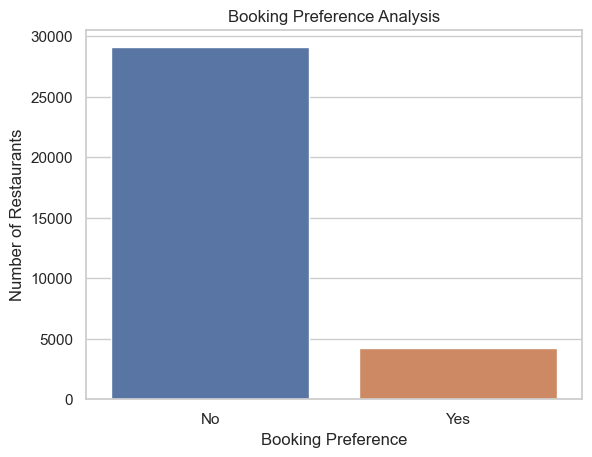

In [42]:
sns.set(style="whitegrid")

# Create a bar plot for booking preferences
sns.barplot(x=booking_preferences.index, y=booking_preferences.values)
plt.xlabel('Booking Preference')
plt.ylabel('Number of Restaurants')
plt.title('Booking Preference Analysis')
plt.show()

- There are almost **5.5 time more hotels** that *don't allow* booking tables in advance.
- This might lead to higher crowds in the most places and waiting periods.
- This is an opportunity for the hotel to get more customers on boards and practice delivering better service.

#### Order Online Trends

In [43]:
order_online_preferences = df['online_order'].value_counts()

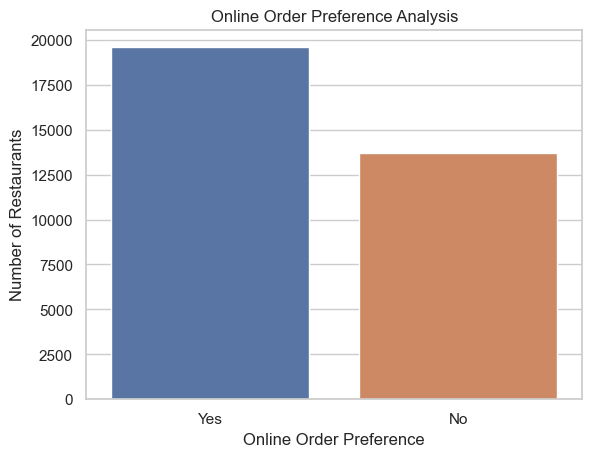

In [44]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a bar plot for booking preferences
# plt.figure(figsize=(8, 6))
sns.barplot(x=order_online_preferences.index, y=order_online_preferences.values)
plt.xlabel('Online Order Preference')
plt.ylabel('Number of Restaurants')
plt.title('Online Order Preference Analysis')
plt.show()

- Almost **30% more hotel offer online delivery services** to thier customers, that counterparts.
- It more like that hotel offering online order, have more customer and thus more revenue.

#### Number of Online Orders for The Top 10 Hotels

In [45]:
# Calculate the average rating for each hotel
hotel_ratings = df.groupby('hotel_name')['rating'].mean()

# Calculate the number of online orders for each hotel
hotel_orders = df.groupby('hotel_name')['online_order'].count()

# Merge the two dataframes
hotel_preferences = pd.merge(hotel_ratings, hotel_orders, on='hotel_name')

In [46]:
# Sort the hotels by average rating in descending order
hotel_preferences = hotel_preferences.sort_values(by='rating', ascending=False)

# Choose the top N hotels based on average rating
top_rated_hotels = hotel_preferences.head(10)

# Sort the hotels by number of online orders in descending order
hotel_preferences = hotel_preferences.sort_values(by='online_order', ascending=False)

# Choose the top N hotels based on number of online orders
top_booked_hotels = hotel_preferences.head(10)

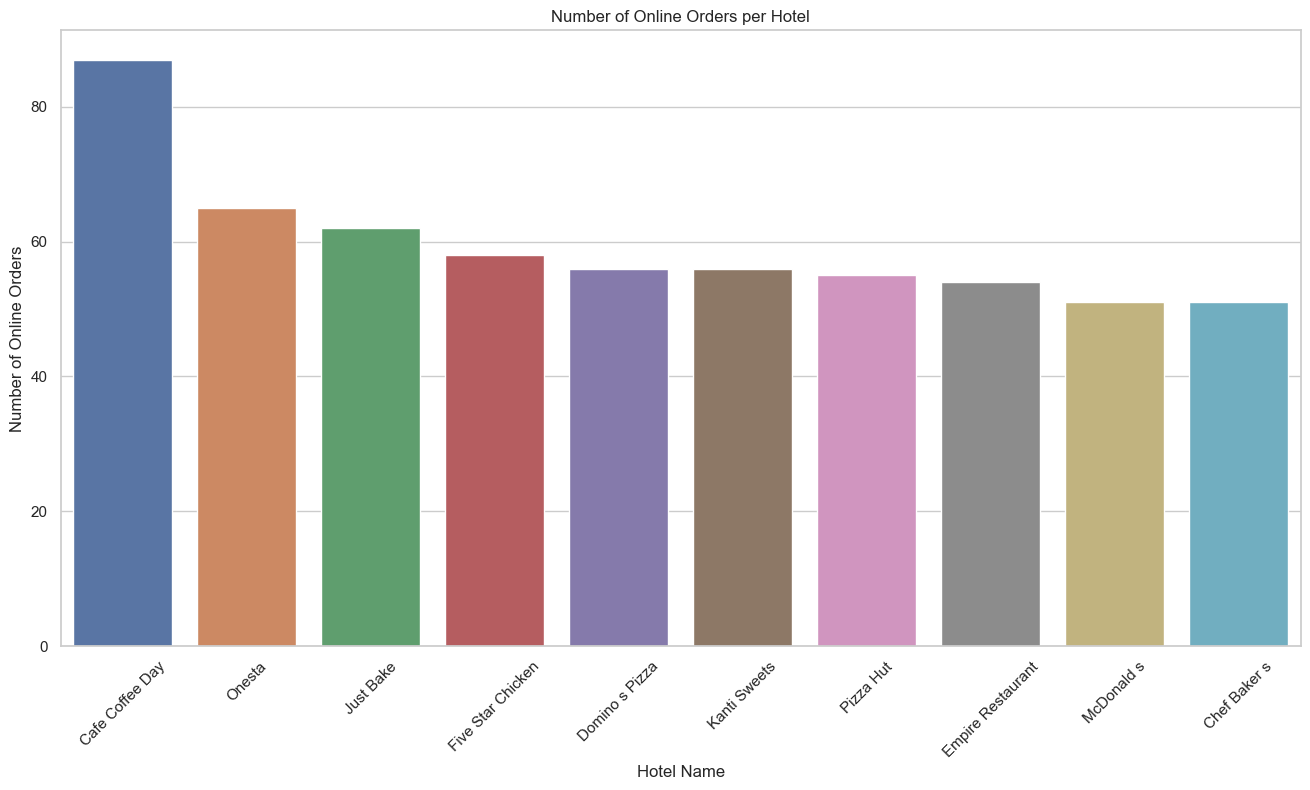

In [47]:
# Create a bar chart showing the number of online orders for each hotel
plt.figure(figsize=(16, 8))
sns.barplot(x=top_booked_hotels.index, y=top_booked_hotels['online_order'])
plt.xlabel('Hotel Name')
plt.ylabel('Number of Online Orders')
plt.title('Number of Online Orders per Hotel')
plt.xticks(rotation=45)
plt.show()

- *Cafe Coffee Day* tops the list of hotel offering oline delivery, with approx. **85 orders** alone.
- On the contrary, other top hotels offer deliver count ranging from **55 to 65**.

#### Number of Table Bookings for The Top 10 Hotels

In [48]:
# Calculate the average rating for each hotel
hotel_ratings = df.groupby('hotel_name')['rating'].mean()

# Calculate the number of online orders for each hotel
hotel_orders = df.groupby('hotel_name')['book_table'].count()

# Merge the two dataframes
hotel_preferences = pd.merge(hotel_ratings, hotel_orders, on='hotel_name')

In [49]:
# Sort the hotels by average rating in descending order
hotel_preferences = hotel_preferences.sort_values(by='rating', ascending=False)

# Choose the top N hotels based on average rating
top_rated_hotels = hotel_preferences.head(10)

# Sort the hotels by number of online orders in descending order
hotel_preferences = hotel_preferences.sort_values(by='book_table', ascending=False)

# Choose the top N hotels based on number of online orders
top_booked_hotels = hotel_preferences.head(10)

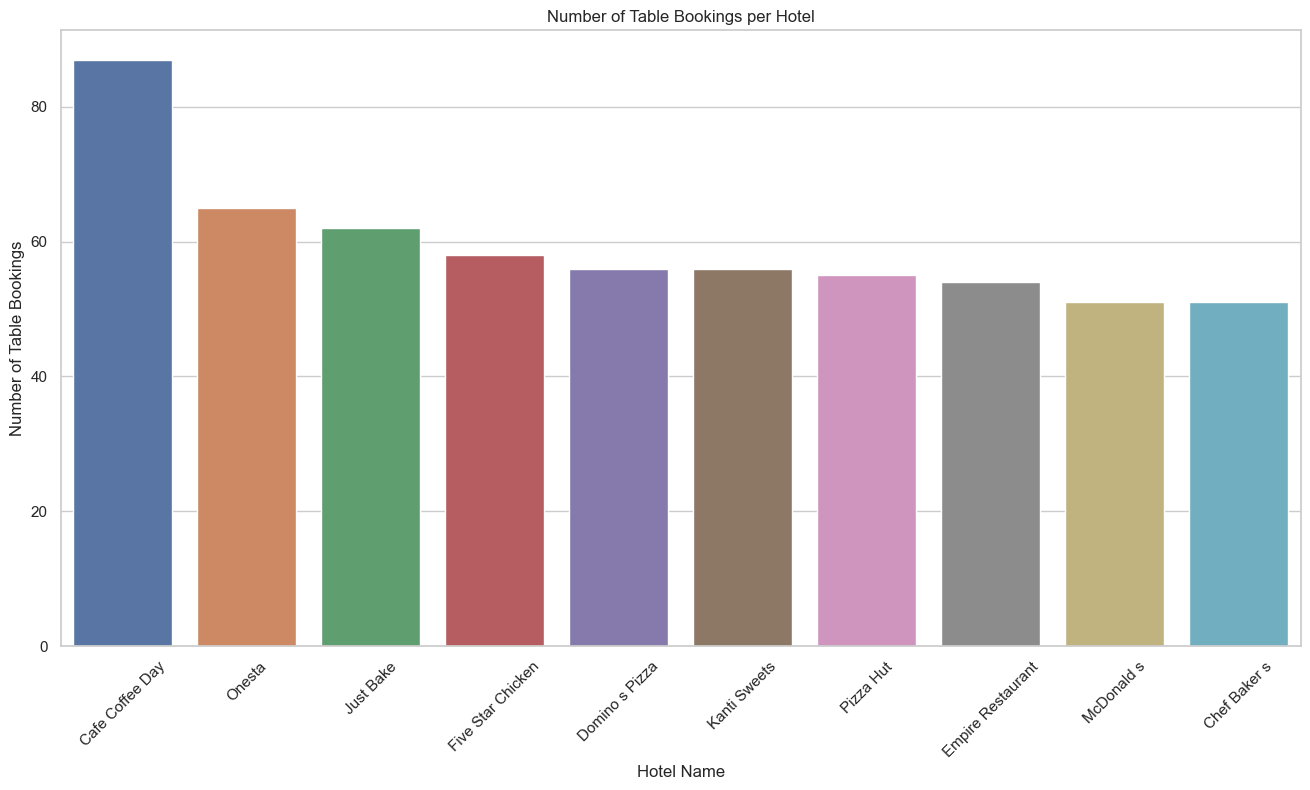

In [50]:
# Create a bar chart showing the number of online orders for each hotel
plt.figure(figsize=(16, 8))
sns.barplot(x=top_booked_hotels.index, y=top_booked_hotels['book_table'])
plt.xlabel('Hotel Name')
plt.ylabel('Number of Table Bookings')
plt.title('Number of Table Bookings per Hotel')
plt.xticks(rotation=45)
plt.show()

- *Cafe Coffee Day* tops the list of hotel offering booking table, again, with approx. **85 orders** alone.
- On the contrary, other top hotels offer deliver count ranging from **55 to 65**.
- *There is no significant difference in the number of table bookings between top and bottom rated hotels*

#### Location Preferences based on Rating

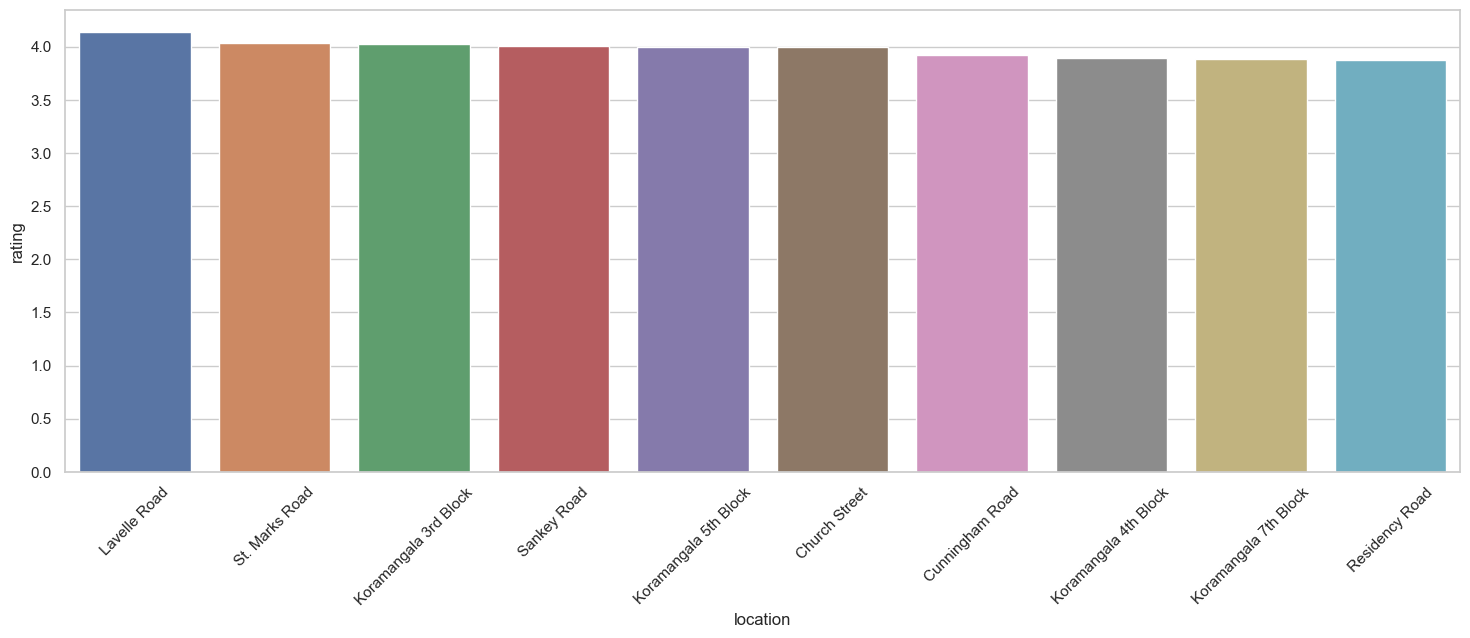

In [51]:
# Calculate the average rating for each location
location_ratings = df.groupby('location')['rating'].mean().reset_index()
location_ratings

# Sort the locations by rating in descending order and select the top 10
top_10_locations_by_rating = location_ratings.sort_values(by='rating', ascending=False).head(10)
top_10_locations_by_rating

plt.figure(figsize=(18, 6))
sns.barplot(data = top_10_locations_by_rating, x = 'location', y = 'rating')
plt.xticks(rotation=45)
plt.show()

- All the Top Hotels with the most number of Rating will the minimum rating of **3.8**.
- Hence, you're asured to get the best service from these top locations.

#### Most Expensive Hotels according to the Rest Types

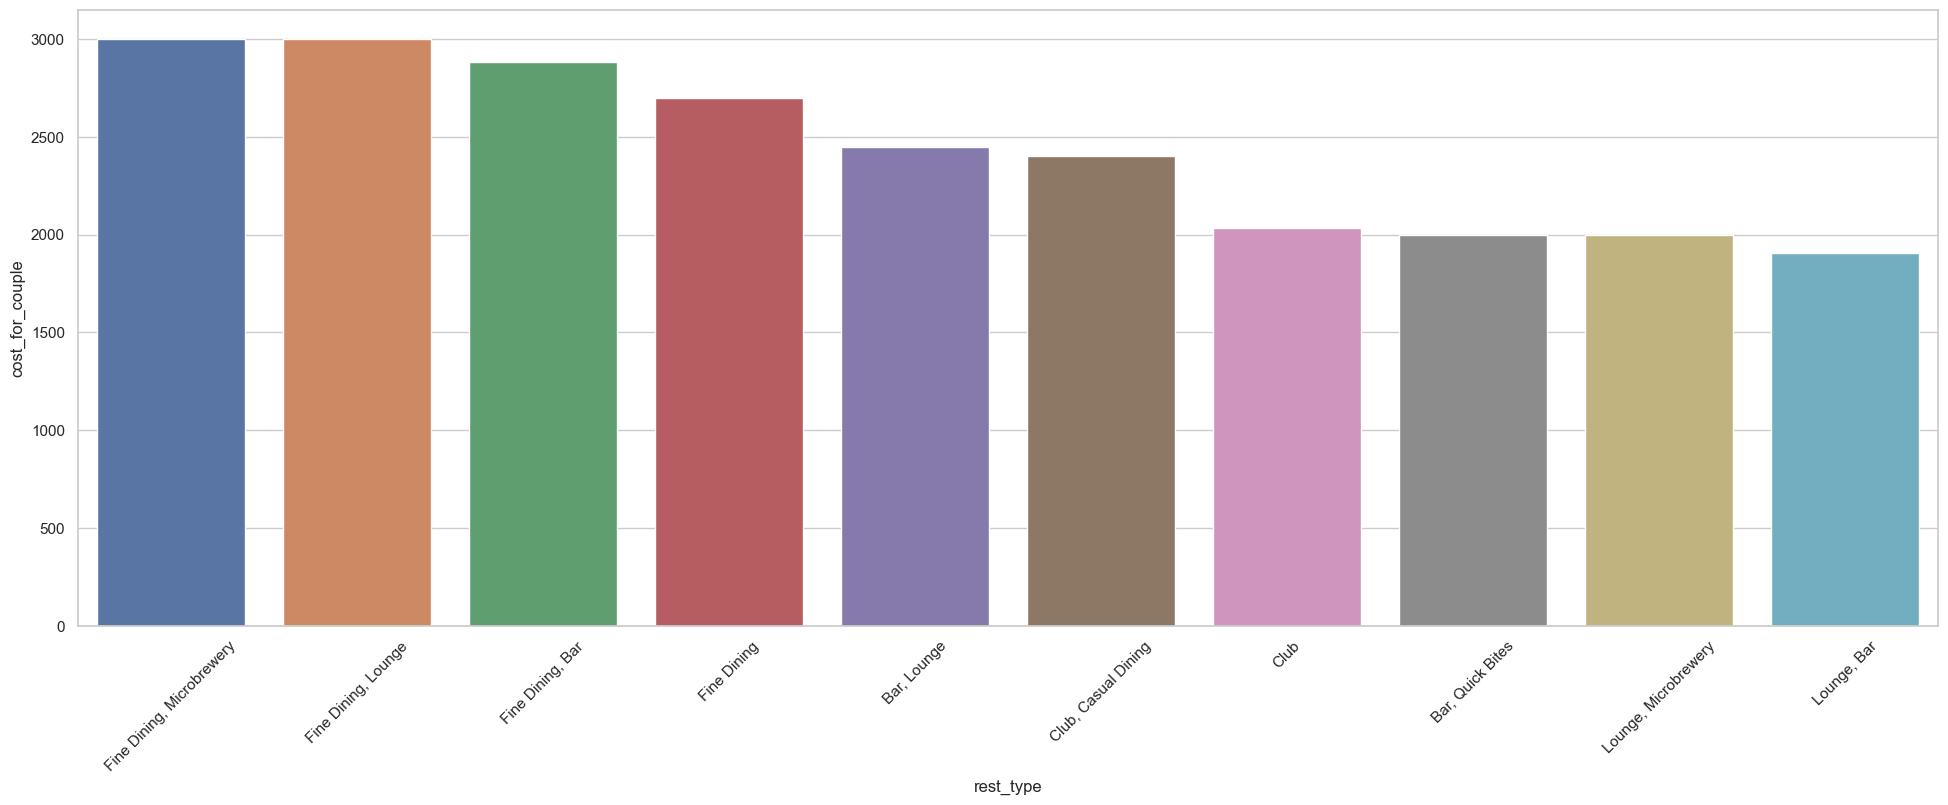

In [52]:
# Calculate the average cost_for_couple for each rest_type
rest_type_costs = df.groupby('rest_type')['cost_for_couple'].mean().reset_index()

# Sort the rest_type categories by cost_for_couple in descending order and select the top 10
top_10_rest_types = rest_type_costs.sort_values(by='cost_for_couple', ascending=False).head(10)

plt.figure(figsize=(24, 8))
sns.barplot(data = top_10_rest_types, x = 'rest_type', y = 'cost_for_couple')
plt.xticks(rotation=45)
plt.show()

- In terms of Cost, Fine Dining - Microbrewery, Fine Dining - Lounges and Fine Dining, Bar are the most expensive Restaurant types with **approx. cost of 2,900 and above**.
- Other best option range from **1,900 to 2,900** respectively.

#### Number of Restaurants in Each Location

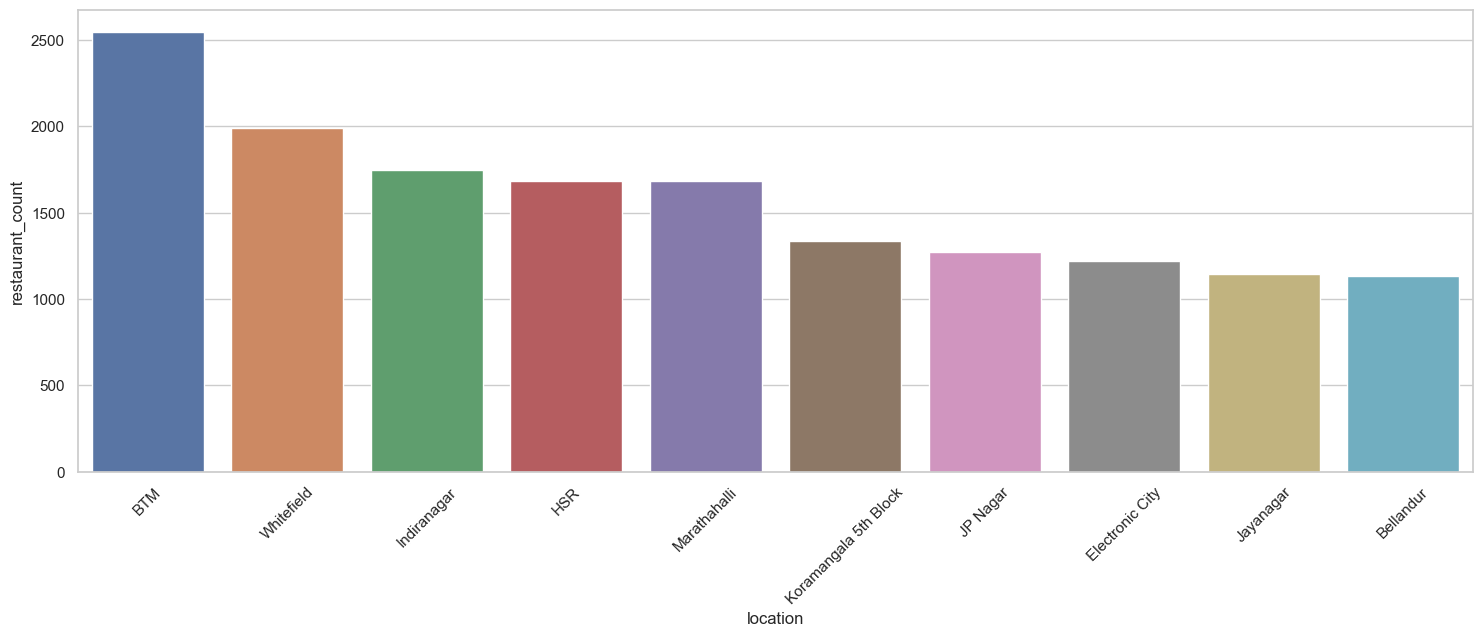

In [53]:
# Count the number of restaurants in each location
location_counts = df['location'].value_counts().reset_index()
location_counts.columns = ['location', 'restaurant_count']

# Sort the locations by restaurant count in descending order
location_counts = location_counts.sort_values(by='restaurant_count', ascending=False).head(10)

plt.figure(figsize=(18, 6))
sns.barplot(location_counts, x="location", y="restaurant_count")
plt.xticks(rotation=45)
plt.show()

- Considering the availability of the Hotels, BTM tops the list with 2,500+ hotels.
- Comparing to other locations, the number of restaurants range from **1,500 to 2,000 for top 4 locations** and **1,000 to 1,500** for the other best location.

#### Relationship between Cost and Rating

In [54]:
rating_by_price = df.groupby('cost_for_couple')['rating'].mean()

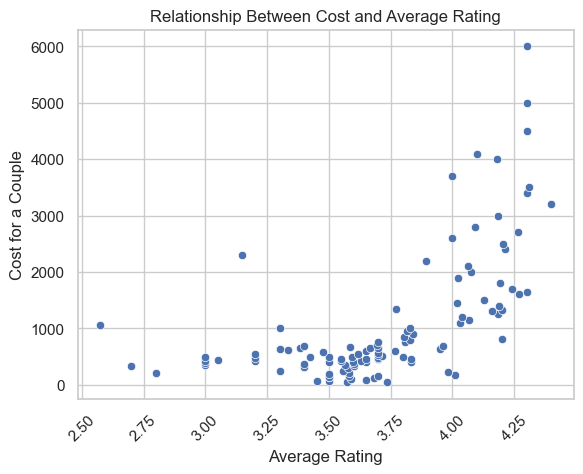

In [55]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a scatter plot for rating vs. cost_for_couple
# plt.figure(figsize=(10, 6))
sns.scatterplot(x=rating_by_price.values, y=rating_by_price.index,)
plt.xlabel('Average Rating')
plt.ylabel('Cost for a Couple')
plt.title('Relationship Between Cost and Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

- Majority of Hotel offer the will ave the **rating of above 3.25** and will cost anything from **1,000 to 3,000** which is fairly reasonable.
- when looking for hotel with **rating above 4**, the range from **1,000 to 5,000.**
- To an extent, **the cost for a couple is directly proportional to the rating.**

#### Most Popular Cuisines Top 10 Locations

In [56]:
cuisine_counts = df.groupby(['location', 'cuisines'])['cuisines'].count().reset_index(name='count')

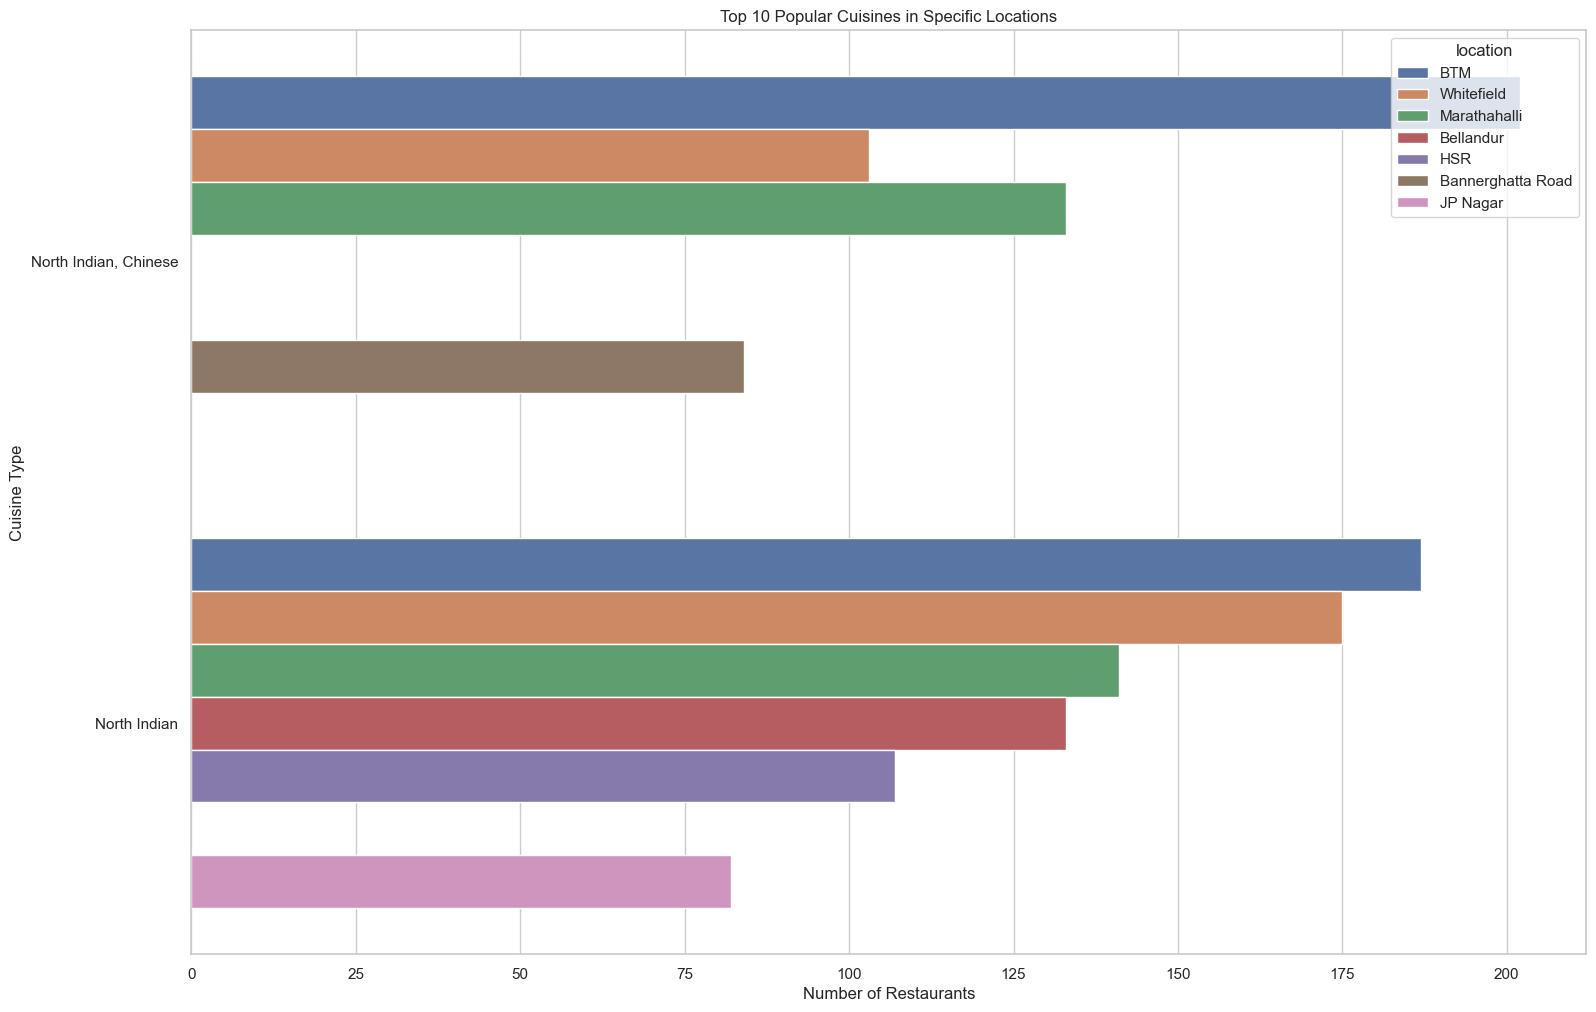

In [57]:
sns.set(style="whitegrid")

# Create a bar plot for popular cuisines in specific locations
plt.figure(figsize=(18, 12))
sns.barplot(data=cuisine_counts.nlargest(10, 'count'), x='count', y='cuisines', hue='location')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Popular Cuisines in Specific Locations')
plt.show()

- North Indian and Chinese are the 2 most popular cuisines in all locations.
- Specifically, BTM and Marathahalli offer the best in class North Indian and Chinese cuisines.

#### Top 10 Locations with Most Unique Cuisines

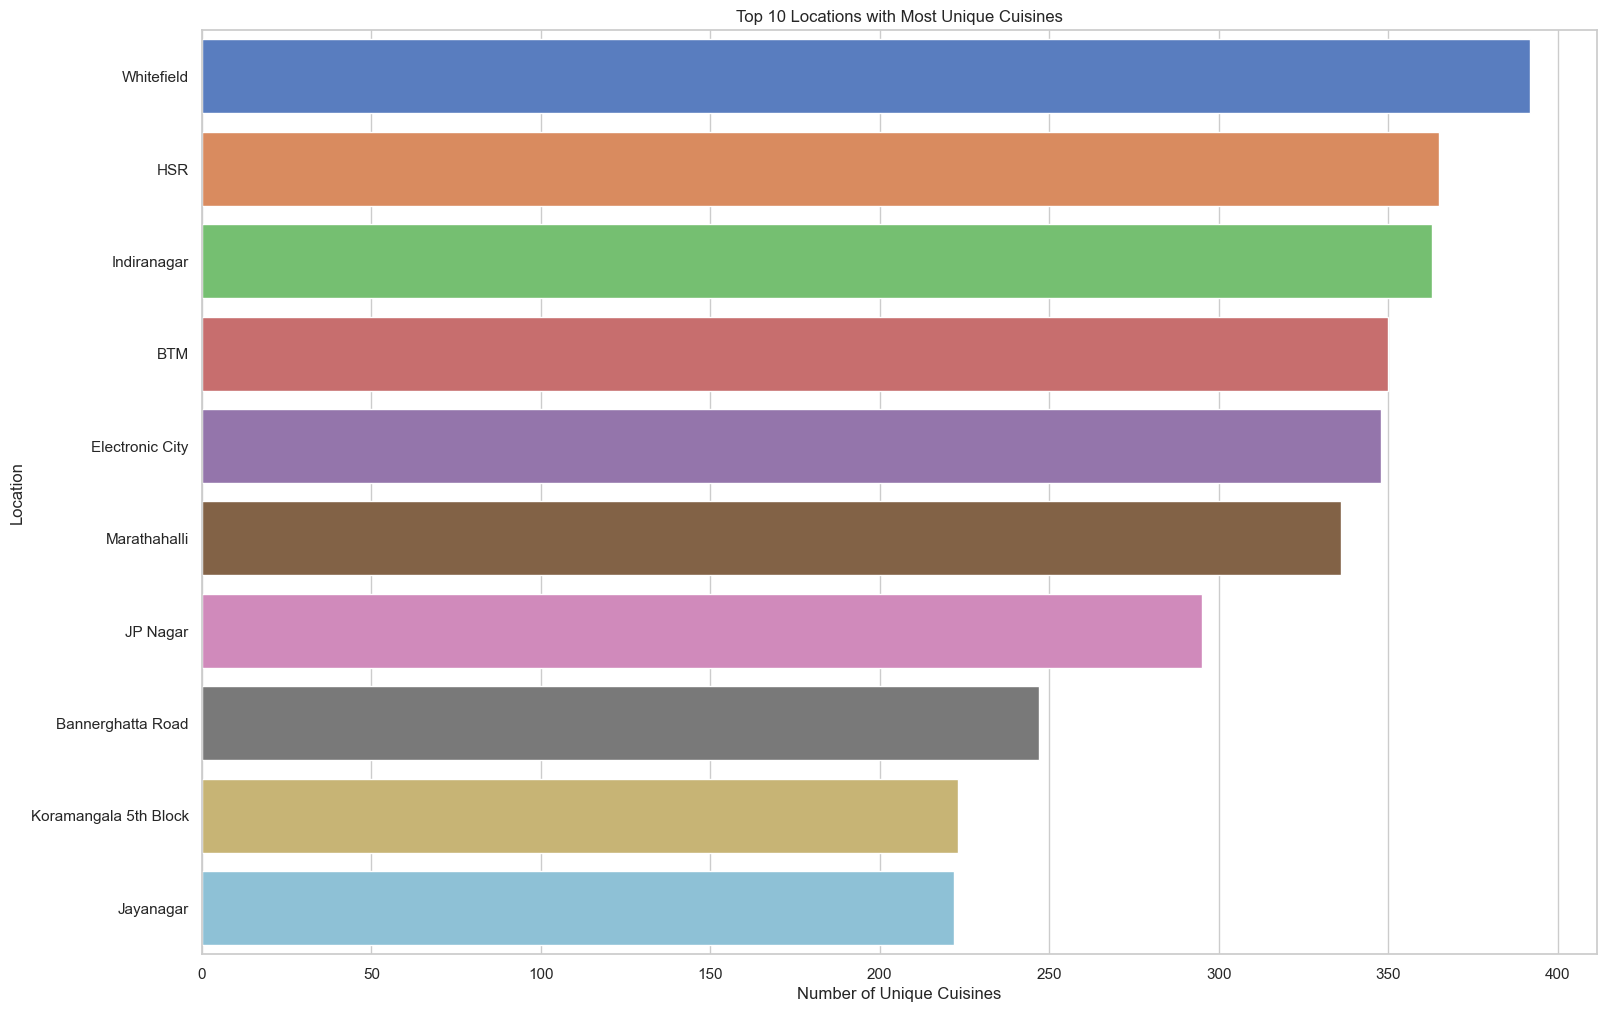

In [58]:
# Calculate the number of unique cuisines per location
unique_cuisine_counts = df.groupby('location')['cuisines'].nunique().reset_index(name='unique_cuisines_count')

# Sort the locations by the number of unique cuisines in descending order
unique_cuisine_counts = unique_cuisine_counts.sort_values(by='unique_cuisines_count', ascending=False)

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a bar plot for the number of unique cuisines in specific locations
plt.figure(figsize=(18, 12))
sns.barplot(data=unique_cuisine_counts.nlargest(10, 'unique_cuisines_count'), x='unique_cuisines_count', y='location', palette='muted')
plt.xlabel('Number of Unique Cuisines')
plt.ylabel('Location')
plt.title('Top 10 Locations with Most Unique Cuisines')
plt.show()

- Whitefield is the top location with approx. **350+ unique cuisines**.
- Hotel from 2nd to 6th ranks do offers uniques **300 to 350 cuisines.**

#### Restaurant Density Availablity

In [59]:
restaurant_density = df['location'].value_counts().reset_index()
restaurant_density.columns = ['location', 'restaurant_count']

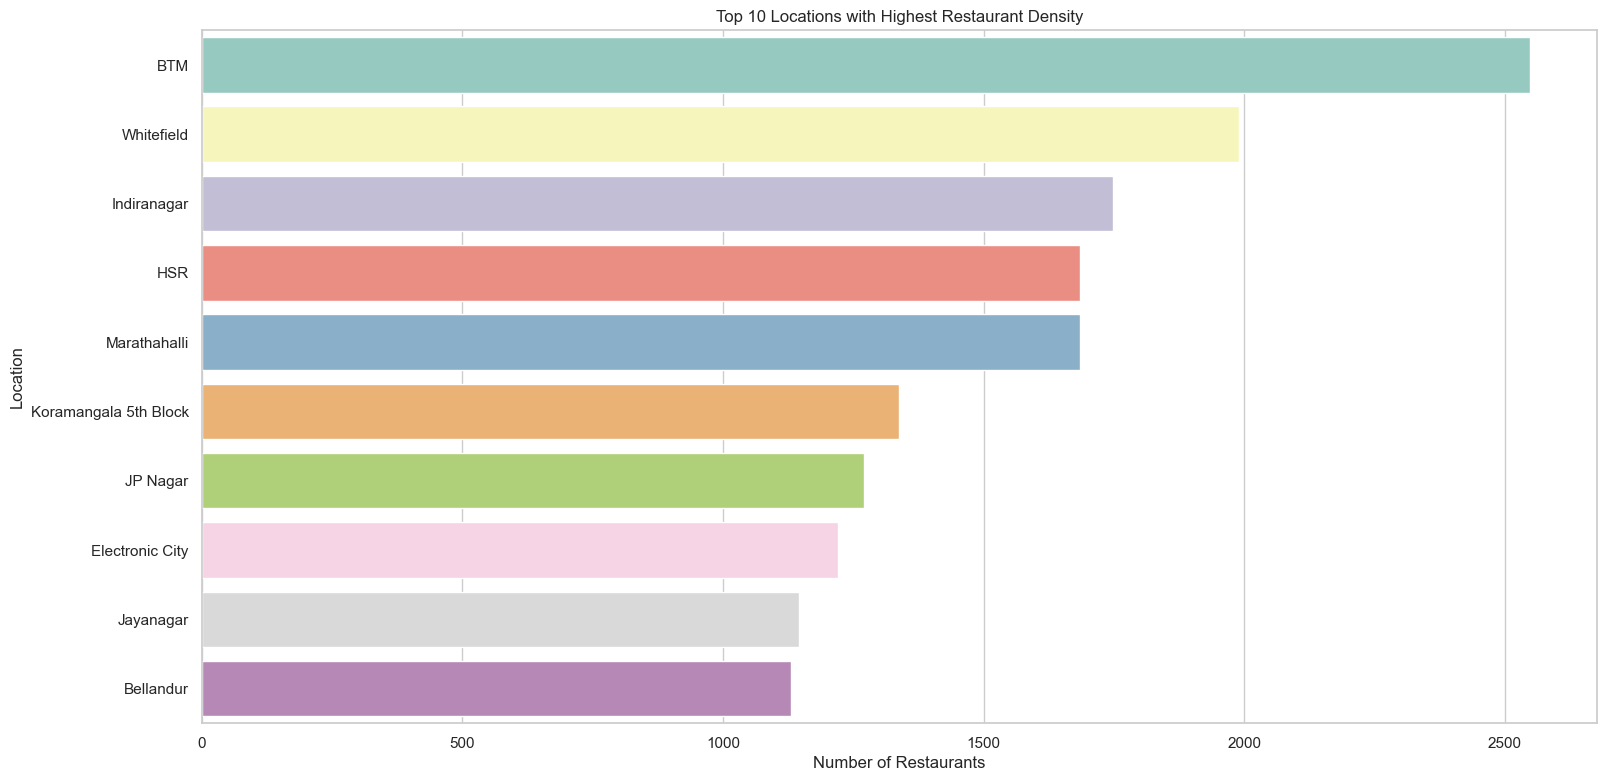

In [60]:
sns.set(style="whitegrid")

# Create a bar plot for restaurant density
plt.figure(figsize=(18, 9))
sns.barplot(data=restaurant_density.nlargest(10, 'restaurant_count'), x='restaurant_count', y='location', palette='Set3')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.title('Top 10 Locations with Highest Restaurant Density')
plt.show()

- BTM location has the most number of hotel, i.e., 2500+.
- Other best 4 best performing locations have **approx. 1500 to 2000** number of hotel.
- The rest of the locations have **alteast 1000** hotels.

#### Top 10 Locations with Most Online Orders

In [61]:
# Calculate the number of orders for each location
location_orders = df.groupby('location')['online_order'].count().reset_index(name='order_count')

# Sort the locations by the number of orders in descending order
top_10_locations = location_orders.nlargest(10, 'order_count')

# Filter the original DataFrame to include only data for the top 10 locations
df_top_10 = df[df['location'].isin(top_10_locations['location'])]

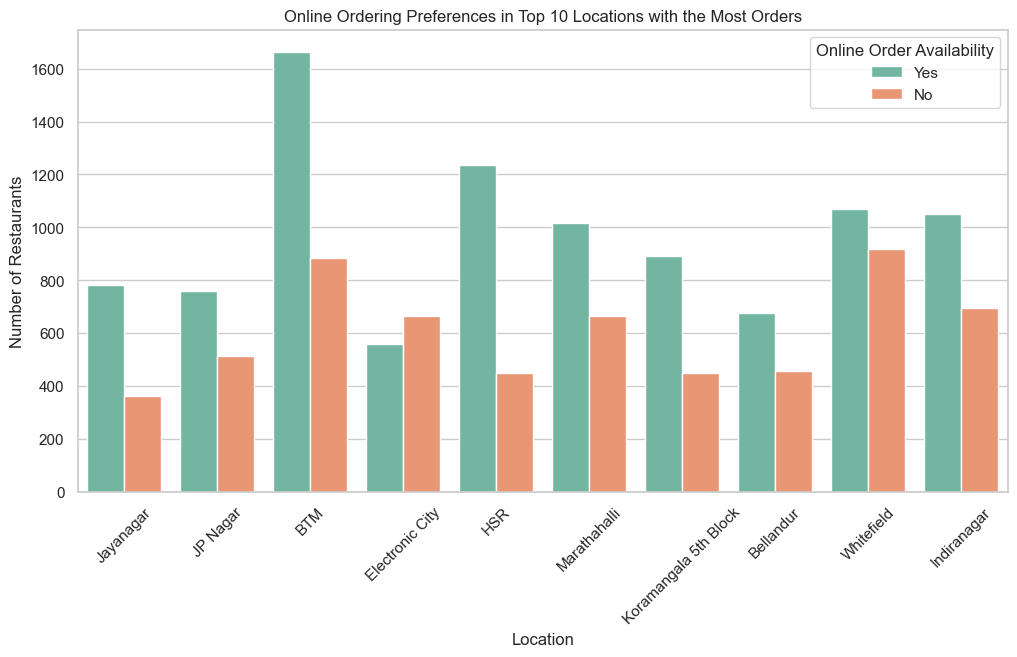

In [62]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a count plot for online ordering preferences in the top 10 locations
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='location', hue='online_order', palette='Set2')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.title('Online Ordering Preferences in Top 10 Locations with the Most Orders')
plt.legend(title='Online Order Availability', labels=['Yes', 'No'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

- Out of all the hotels with the most number online orders, **90% of the hotels have higher chance of ofeering online orders**, except *Electronic City*.

#### Top 10 Locations with Most Table Bookings

In [63]:
# Calculate the number of table bookings for each location
location_bookings = df.groupby('location')['book_table'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='booking_count')

# Sort the locations by the number of table bookings in descending order
top_10_locations = location_bookings.nlargest(10, 'booking_count')

# Filter the original DataFrame to include only data for the top 10 locations
df_top_10 = df[df['location'].isin(top_10_locations['location'])]

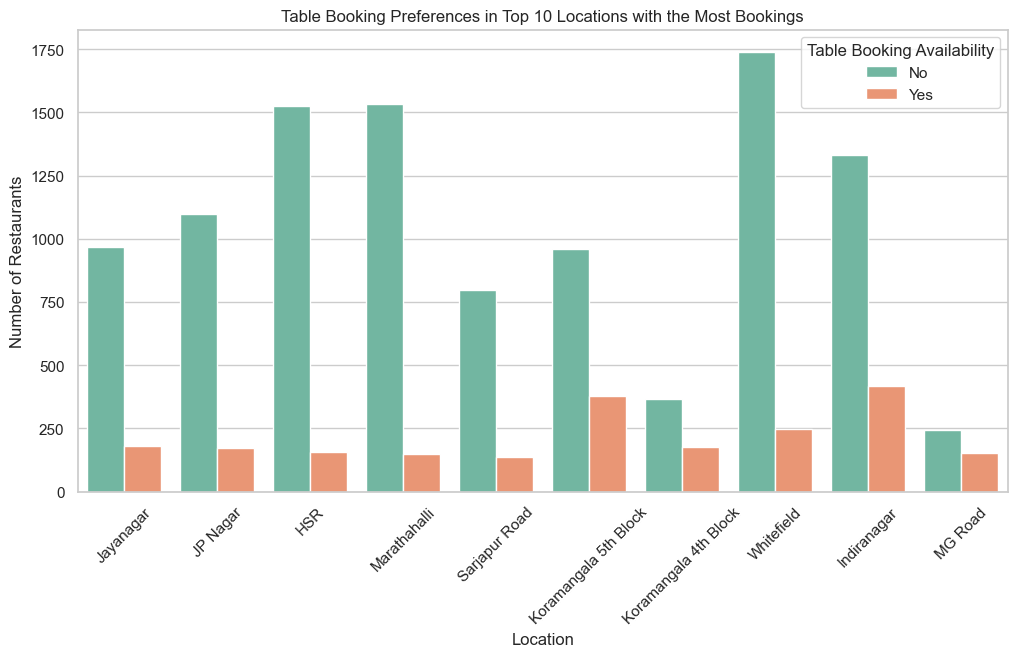

In [64]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a count plot for table booking preferences in the top 10 locations
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='location', hue='book_table', palette='Set2')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.title('Table Booking Preferences in Top 10 Locations with the Most Bookings')
plt.legend(title='Table Booking Availability', labels=['No', 'Yes'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

- Out of all the hotels allowing table booking, only, *Koramangala 4th Block* and and *MG Road* have 50% possibility of offering table booking.
- For other locations, the allowing booking table is **near to 20%.**

#### Most Affordable Locations for a Couple with the most Available Hotels 

In [65]:
# Calculate the number of hotels per location
location_hotel_counts = df['location'].value_counts().reset_index()
location_hotel_counts.columns = ['location', 'hotel_count']

# Sort the locations by the number of hotels in descending order and select the top 10
top_10_locations = location_hotel_counts.nlargest(10, 'hotel_count')

# Filter the original DataFrame to include only data for the top 10 locations
df_top_10 = df[df['location'].isin(top_10_locations['location'])]

# Calculate the mean cost for a couple in each of the top 10 locations
cost_by_location = df_top_10.groupby('location')['cost_for_couple'].mean().reset_index()

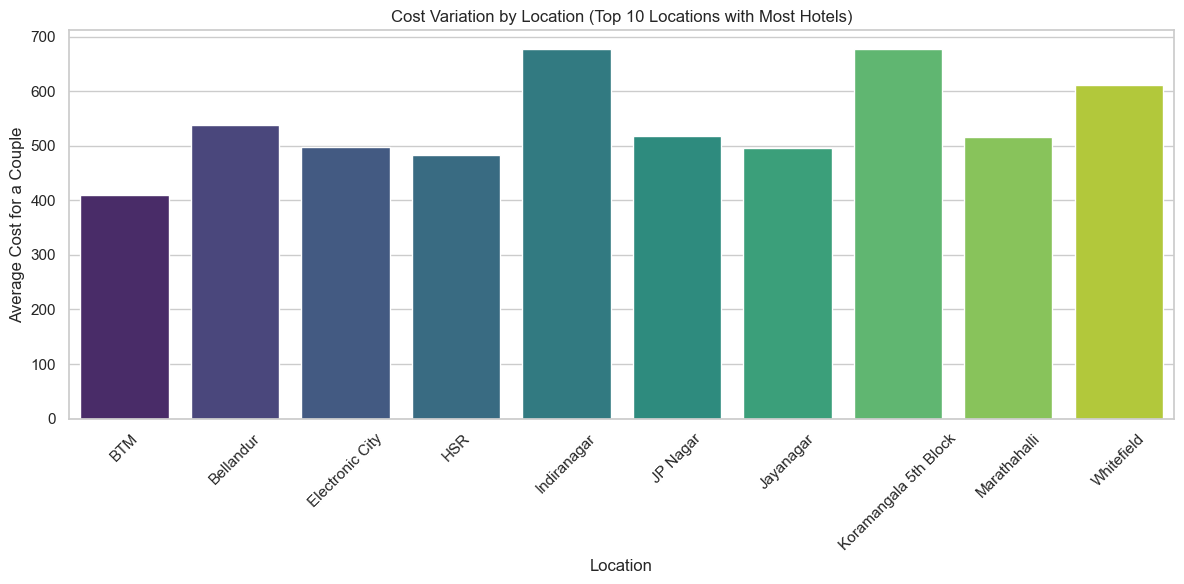

In [66]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a bar plot for cost variation by location
plt.figure(figsize=(12, 6))
sns.barplot(data=cost_by_location, x='location', y='cost_for_couple', palette='viridis')
plt.xlabel('Location')
plt.ylabel('Average Cost for a Couple')
plt.title('Cost Variation by Location (Top 10 Locations with Most Hotels)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

- BTM has the **lowest cost** of the other high-quality competitors, i.e., **400**.
- On the contrary, **average cost** for the other competitors goes upto **550.**